In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [3]:
dat=plt.imread('/home/mohan/Downloads/jon_mad_scientist_ln2_ice_cream.jpg')

In [4]:
dat.shape

(443, 665, 3)

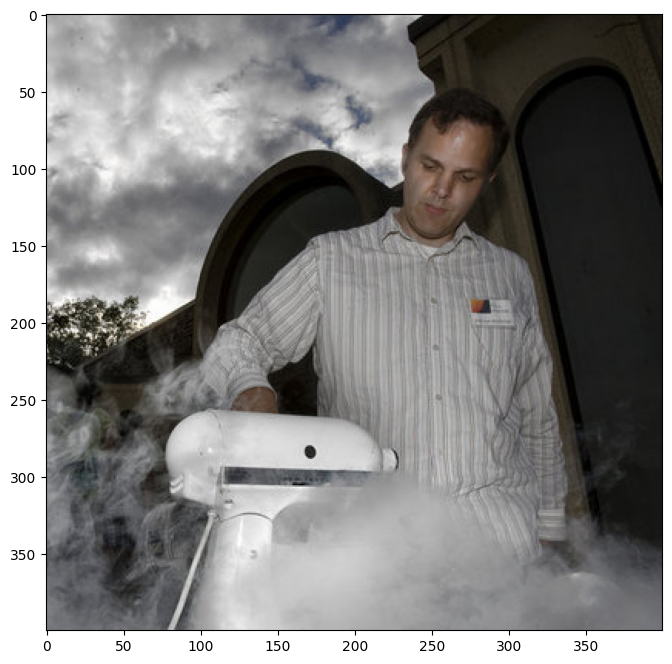

In [10]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(10,8)
ax.imshow(dat[:400,200:200+400,:],aspect='equal')
# plt.colorbar()

In [11]:
# r=dat[1330:1330+2048,1100:1100+2048,0].copy()
# b=dat[1330:1330+2048,1100:1100+2048,1].copy()
# g=dat[1330:1330+2048,1100:1100+2048,2].copy()
# print(im.shape)
dat[:400,200:,:]
r=dat[:400,200:600,0].copy()
b=dat[:400,200:600,1].copy()
g=dat[:400,200:600,2].copy()
print(r.shape)

(400, 400)


In [12]:
def get_filtered_channel(im,res):
    imfft=np.fft.fft2(im)
    N = im.shape[0]
    kres = 1/np.deg2rad(5)
    kmax = N*kres/2
    new_kmax=1/(2*res)
#     new_kmax=int(kmax/239)
    print(kres,kmax,new_kmax)
    kcutoff=int(new_kmax/kres)
    print(kcutoff)
    sigma=kcutoff
    vec=np.fft.fftfreq(N)*N
    # print(vec)
    X,Y=np.meshgrid(vec,vec)
#     print(X)
    kernel= 10*np.exp(-0.5*(X**2+Y**2)/sigma**2)
    newfft=imfft*kernel
    return np.fft.ifft2(newfft).real

In [63]:
7/(1*60/2048)

238.93333333333334

In [7]:
1/(np.deg2rad(5)/256)/2

1466.7719555349074

In [9]:
1/(np.deg2rad(2))/2

14.32394487827058

In [13]:
N=r.shape[0]

In [14]:
newres=np.deg2rad(100/60)
newimg=np.zeros((N,N,3),dtype='float64')
newimg1=np.zeros((N,N,3),dtype='float64')
newimg[:,:,0]=get_filtered_channel(r,newres)
newimg[:,:,1]=get_filtered_channel(b,newres)
newimg[:,:,2]=get_filtered_channel(g,newres)

newres=np.deg2rad(7/60)
newimg1[:,:,0]=get_filtered_channel(r,newres)
newimg1[:,:,1]=get_filtered_channel(b,newres)
newimg1[:,:,2]=get_filtered_channel(g,newres)

11.459155902616464 2291.831180523293 17.188733853924695
1
11.459155902616464 2291.831180523293 17.188733853924695
1
11.459155902616464 2291.831180523293 17.188733853924695
1
11.459155902616464 2291.831180523293 245.5533407703528
21
11.459155902616464 2291.831180523293 245.5533407703528
21
11.459155902616464 2291.831180523293 245.5533407703528
21


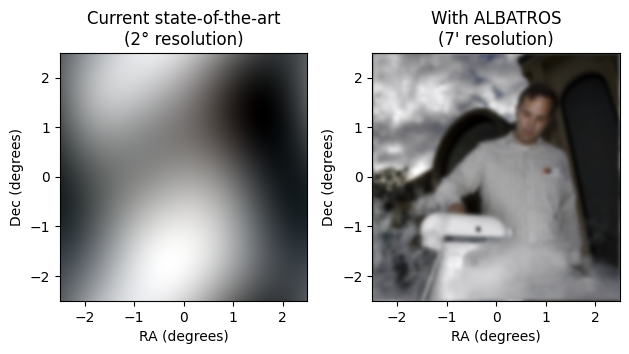

In [15]:
fig=plt.gcf()
# fig.set_size_inches(10,8)
plt.subplot(121)
for ax in range(0,3):
    mn=newimg[:,:,ax].min()
    mx=newimg[:,:,ax].max()
    newimg[:,:,ax]=(newimg[:,:,ax]-mn)/(mx-mn)
    mn=newimg1[:,:,ax].min()
    mx=newimg1[:,:,ax].max()
    newimg1[:,:,ax]=(newimg1[:,:,ax]-mn)/(mx-mn)
plt.imshow(newimg[:,:],aspect='equal',extent=[-2.5,2.5,-2.5,2.5],cmap='inferno')
plt.title("Current state-of-the-art\n(2° resolution)")
plt.xlabel("RA (degrees)")
plt.ylabel("Dec (degrees)")
plt.subplot(122)
plt.title("With ALBATROS\n(7' resolution)")
plt.imshow(newimg1[:,:],aspect='equal',extent=[-2.5,2.5,-2.5,2.5],cmap='inferno')
plt.xlabel("RA (degrees)")
plt.ylabel("Dec (degrees)")
plt.tight_layout()